In [1]:
# importing the necessary libraries
import os  # interact with the operating system
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # Used for creating visualizations, including charts and graphs
from PIL import Image  # To load and process images (Python Imaging Library)
import pandas as pd  # For data manipulation and analysis
from collections import Counter  # Useful for counting hashable objects 
from PIL import ImageStat  # Provides statistics about images
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images.
import warnings # ignores the unnecessary warnings
warnings.filterwarnings("ignore")

In [2]:
# Define the base directory for the dataset
base_dir = "../dataset/"

# Constructing paths for training, validation, and test datasets
train_dir = os.path.join(base_dir, 'train') # Path for the training data
val_dir = os.path.join(base_dir, 'val') # Path for the validation data
test_dir = os.path.join(base_dir, 'test') # Path for the test data

In [3]:
def load_image_paths_and_labels(data_dir):
    image_paths = []  # Initialize an empty list to store image file paths
    labels = []       # Initialize an empty list to store corresponding labels

    # Iterate over KL grades (0-4) in each directory
    for grade in os.listdir(data_dir):  # Loop through each grade directory in the data directory
        grade_dir = os.path.join(data_dir, grade)  # Construct the full path to the grade directory
        if os.path.isdir(grade_dir):  # Check if the grade_dir is indeed a directory
            # Iterate over image files in the grade directory
            for img_file in os.listdir(grade_dir):  # Loop through each image file in the grade directory
                img_path = os.path.join(grade_dir, img_file)  # Construct the full path to the image file
                image_paths.append(img_path)  # Append the image path to the list
                labels.append(int(grade))  # Append the KL grade as an integer to the labels list
    return image_paths, labels  # Return the lists of image paths and labels


In [4]:
# Load training images and their corresponding labels
train_images, train_labels = load_image_paths_and_labels(train_dir)

# Load validation images and their corresponding labels
val_images, val_labels = load_image_paths_and_labels(val_dir)

# Load test images and their corresponding labels
test_images, test_labels = load_image_paths_and_labels(test_dir)

In [5]:
# Create a DataFrame for the training dataset with image paths and labels
train_df = pd.DataFrame({"image_path": train_images, "label": train_labels})

# Create a DataFrame for the validation dataset with image paths and labels
val_df = pd.DataFrame({"image_path": val_images, "label": val_labels})

# Create a DataFrame for the test dataset with image paths and labels
test_df = pd.DataFrame({"image_path": test_images, "label": test_labels})

In [6]:
# Concatenate the training, validation, and test DataFrames into a single DataFrame
full_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [7]:
def check_duplicate_images(df):
    image_hashes = []  # Initialize a list to store hashes of unique images
    duplicates = []     # Initialize a list to store paths of duplicate images
    
    # Iterate over each image path in the DataFrame
    for img_path in df['image_path']:
        img = Image.open(img_path).convert('L')  # Open the image and convert it to grayscale
        img_hash = hash(img.tobytes())  # Create a hash of the image's byte data for comparison
        
        # Check if the image hash is already in the list of hashes
        if img_hash in image_hashes:
            duplicates.append(img_path)  # If it is, add to the duplicates list
        else:
            image_hashes.append(img_hash)  # If not, add the hash to the list of unique hashes
    
    # Print the result of the duplicate check
    if duplicates:
        print(f"Found {len(duplicates)} duplicate images.")  # Report the number of duplicates found
    else:
        print("No duplicates found.")  # Indicate no duplicates were found
    
    return duplicates  # Return the list of duplicate image paths

# Check for duplicate images in the training set
duplicates = check_duplicate_images(train_df)  # Call the function and store the duplicate paths

No duplicates found.


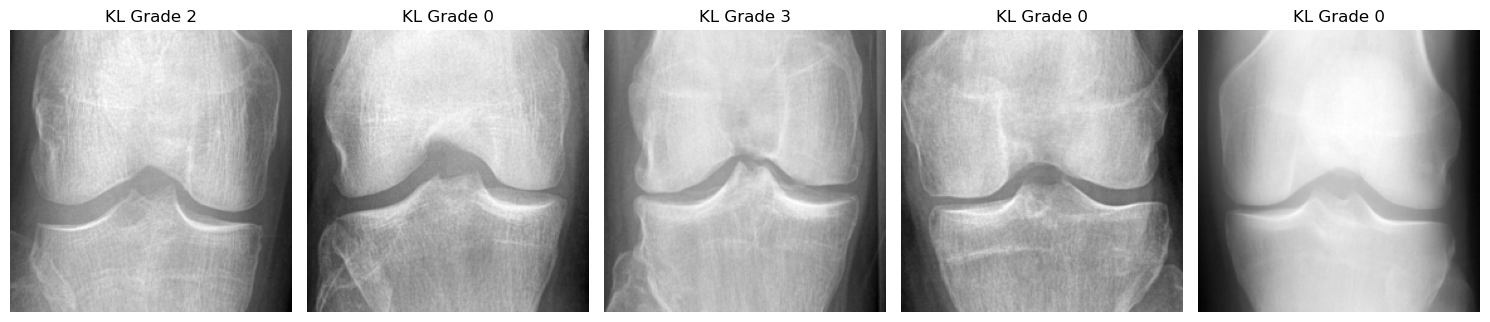

In [8]:
# Display random sample images from the training set
def show_sample_images(df, num_samples=5):
    plt.figure(figsize=(15, 5))  # Set the figure size for the plot
    sample_df = df.sample(num_samples)  # Randomly sample 'num_samples' images from the DataFrame
    
    # Iterate over the sampled images and their labels
    for i, (img_path, label) in enumerate(zip(sample_df['image_path'], sample_df['label'])):
        img = Image.open(img_path)  # Open the image using its file path
        plt.subplot(1, num_samples, i + 1)  # Create a subplot for each image
        plt.imshow(img, cmap='gray')  # Display the image (in grayscale)
        plt.title(f"KL Grade {label}")  # Set the title of the subplot to show the KL grade
        plt.axis('off')  # Turn off the axis for a cleaner look
        
    plt.tight_layout()  # Adjust subplots to fit in the figure area
    plt.show()  # Display the plot

# Display random images from the training set
show_sample_images(train_df, num_samples=5)  # Call the function to display 5 random images

In [9]:
def check_corrupted_images(df):
    corrupted = []  # Initialize a list to store paths of corrupted images
    
    # Iterate over each image path in the DataFrame
    for img_path in df['image_path']:
        try:
            img = Image.open(img_path)  # Attempt to open the image
            img.verify()  # Verify the image integrity; raises an exception if corrupted
        except Exception as e:  # Catch any exceptions that occur
            corrupted.append(img_path)  # Add the corrupted image path to the list
    
    # Print the result of the corrupted image check
    if corrupted:
        print(f"Found {len(corrupted)} corrupted images.")  # Report the number of corrupted images found
    else:
        print("No corrupted images found.")  # Indicate that no corrupted images were found
    
    return corrupted  # Return the list of corrupted image paths

# Check for corrupted images in the training set
corrupted_images = check_corrupted_images(train_df)  # Call the function and store the paths of corrupted images

No corrupted images found.


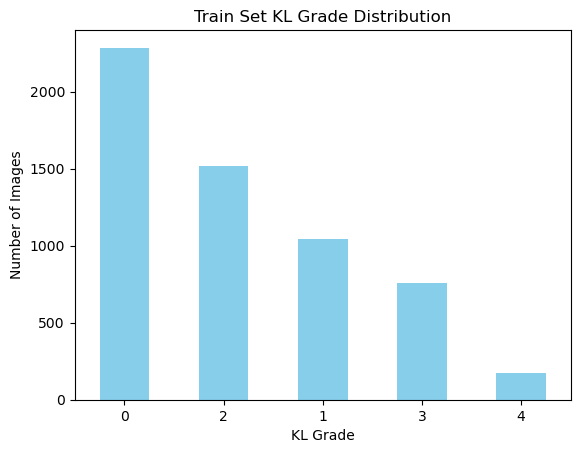

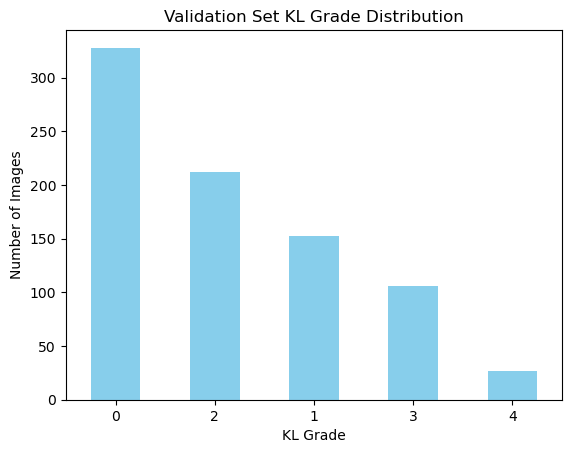

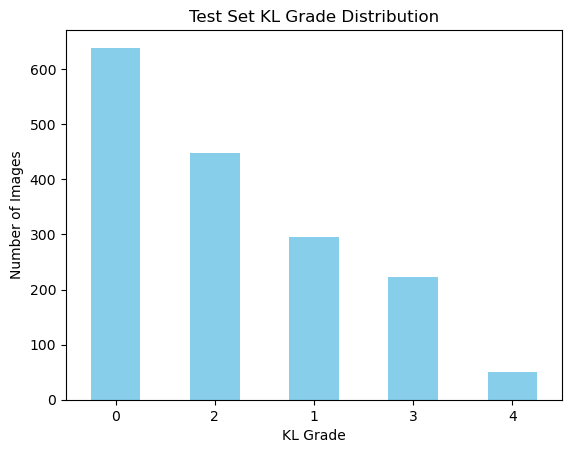

In [10]:
# Check the distribution of KL grades in each split
def plot_label_distribution(df, title):
    label_counts = df['label'].value_counts()  # Count occurrences of each KL grade in the DataFrame
    label_counts.plot(kind='bar', color='skyblue')  # Create a bar plot of the label counts
    plt.title(title)  # Set the plot title
    plt.xlabel('KL Grade')  # Label for the x-axis
    plt.ylabel('Number of Images')  # Label for the y-axis
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.show()  # Display the plot

# Plot distribution for each set
plot_label_distribution(train_df, "Train Set KL Grade Distribution")  # Plot for training set
plot_label_distribution(val_df, "Validation Set KL Grade Distribution")  # Plot for validation set
plot_label_distribution(test_df, "Test Set KL Grade Distribution")  # Plot for test set


In [11]:
# Check basic statistics of images and labels
def dataset_stats(df):
    print("Dataset Statistics:")  # Print header for statistics
    print(f"Total images: {len(df)}")  # Print the total number of images in the DataFrame
    print(f"KL Grade distribution:\n{df['label'].value_counts()}")  # Print the distribution of KL grades

# Print stats for train, val, and test sets
print("Train Set Stats:")  # Indicate that we are printing stats for the training set
dataset_stats(train_df)  # Call the function to print statistics for the training set
print("\nValidation Set Stats:")  # Indicate that we are printing stats for the validation set
dataset_stats(val_df)  # Call the function to print statistics for the validation set
print("\nTest Set Stats:")  # Indicate that we are printing stats for the test set
dataset_stats(test_df)  # Call the function to print statistics for the test set

Train Set Stats:
Dataset Statistics:
Total images: 5778
KL Grade distribution:
label
0    2286
2    1516
1    1046
3     757
4     173
Name: count, dtype: int64

Validation Set Stats:
Dataset Statistics:
Total images: 826
KL Grade distribution:
label
0    328
2    212
1    153
3    106
4     27
Name: count, dtype: int64

Test Set Stats:
Dataset Statistics:
Total images: 1656
KL Grade distribution:
label
0    639
2    447
1    296
3    223
4     51
Name: count, dtype: int64



Image Dimensions Stats:
        width  height
count  5778.0  5778.0
mean    224.0   224.0
std       0.0     0.0
min     224.0   224.0
25%     224.0   224.0
50%     224.0   224.0
75%     224.0   224.0
max     224.0   224.0


Text(0.5, 0, 'Width')

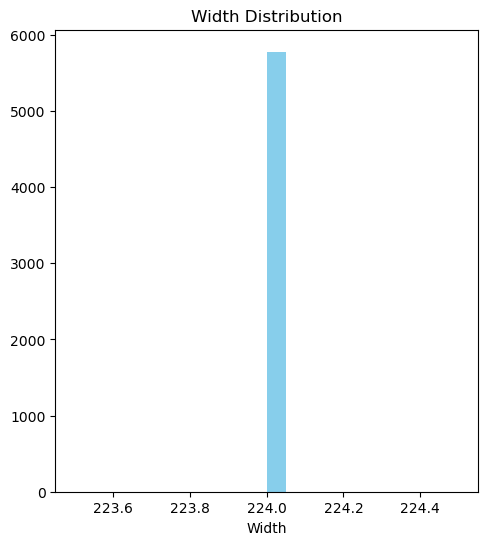

In [12]:
# Check image sizes (dimensions)
def check_image_dimensions(df):
    dimensions = []  # Initialize a list to store image dimensions (width, height)
    
    # Iterate over each image path in the DataFrame
    for img_path in df['image_path']:
        with Image.open(img_path) as img:  # Open the image file
            dimensions.append(img.size)  # Append the size (width, height) to the dimensions list
            
    # Create a DataFrame to store dimensions
    dim_df = pd.DataFrame(dimensions, columns=['width', 'height'])  # Convert dimensions list to DataFrame
    
    print("\nImage Dimensions Stats:")  # Print header for image dimensions statistics
    print(dim_df.describe())  # Print summary statistics (count, mean, std, min, 25%, 50%, 75%, max)
    
    return dim_df  # Return the DataFrame containing image dimensions

# Check image dimensions in the training set
train_dimensions = check_image_dimensions(train_df)  # Call the function and store dimensions

# Plot image dimension distribution
plt.figure(figsize=(12, 6))  # Set figure size for the plot
plt.subplot(1, 2, 1)  # Create the first subplot for width distribution
plt.hist(train_dimensions['width'], bins=20, color='skyblue')  # Create a histogram of image widths
plt.title("Width Distribution")  # Set the title for the width distribution plot
plt.xlabel("Width")  # Label the x-axis

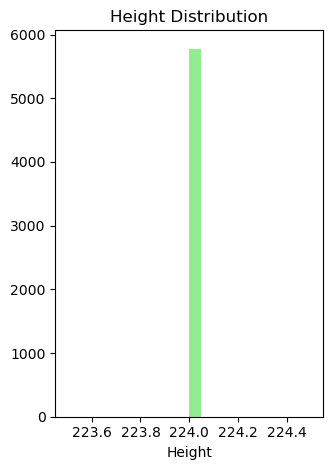

In [13]:
# Plot height distribution of images
plt.subplot(1, 2, 2)  # Create the second subplot for height distribution
plt.hist(train_dimensions['height'], bins=20, color='lightgreen')  # Create a histogram of image heights
plt.title("Height Distribution")  # Set the title for the height distribution plot
plt.xlabel("Height")  # Label the x-axis

plt.tight_layout()  # Adjust the layout to prevent overlap between subplots
plt.show()  # Display the plots

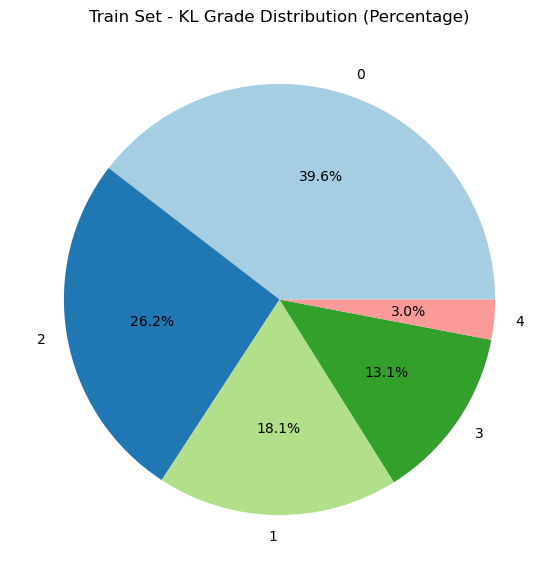

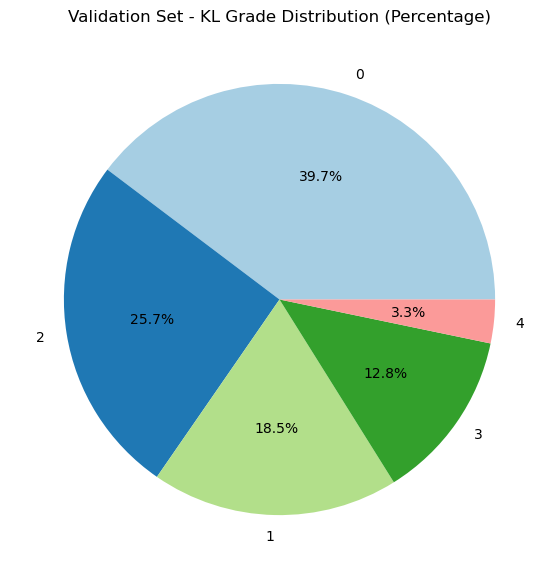

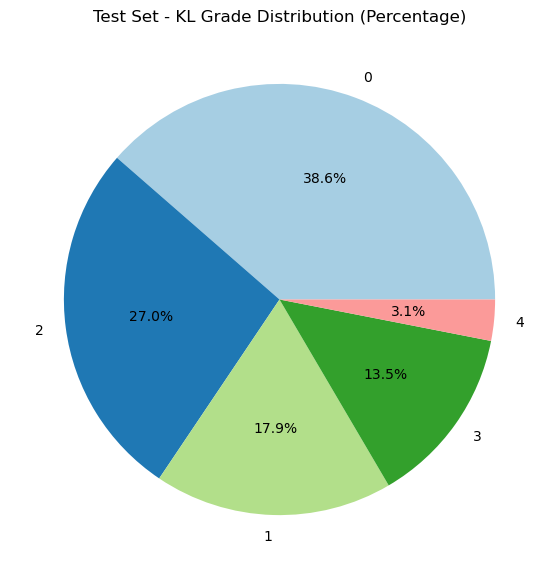

In [14]:
def plot_label_distribution_pie(df, title):
    label_counts = df['label'].value_counts()  # Count occurrences of each KL grade in the DataFrame
    plt.figure(figsize=(7, 7))  # Set figure size for the pie chart
    
    # Create a pie chart showing the distribution of KL grades
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    
    plt.title(f"{title} - KL Grade Distribution (Percentage)")  # Set the title of the pie chart
    plt.show()  # Display the pie chart

# Plot pie charts for each dataset
plot_label_distribution_pie(train_df, "Train Set")  # Pie chart for training set
plot_label_distribution_pie(val_df, "Validation Set")  # Pie chart for validation set
plot_label_distribution_pie(test_df, "Test Set")  # Pie chart for test set

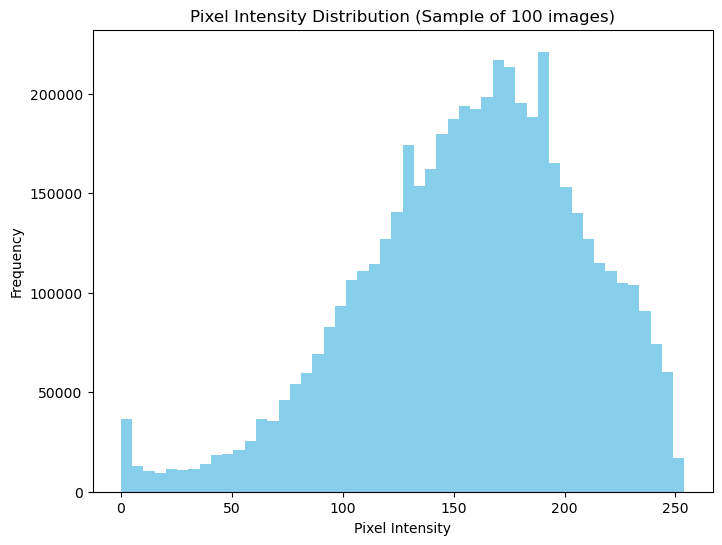

In [15]:
def plot_pixel_intensity_distribution(df, num_samples=100):
    intensities = []  # Initialize a list to store pixel intensity values
    sample_df = df.sample(num_samples)  # Take a random sample of images from the DataFrame
    
    # Iterate over each image path in the sampled DataFrame
    for img_path in sample_df['image_path']:
        img = Image.open(img_path).convert('L')  # Open the image and convert it to grayscale
        intensities.extend(np.array(img).flatten())  # Flatten the image pixel values into a 1D array and add to the intensities list
    
    # Create a histogram to visualize the pixel intensity distribution
    plt.figure(figsize=(8, 6))  # Set figure size for the histogram
    plt.hist(intensities, bins=50, color='skyblue')  # Plot the histogram of pixel intensities
    plt.title(f'Pixel Intensity Distribution (Sample of {num_samples} images)')  # Set the title
    plt.xlabel('Pixel Intensity')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.show()  # Display the histogram

# Analyze pixel intensity distribution in the training set
plot_pixel_intensity_distribution(train_df, num_samples=100)  # Call the function for a sample of 100 images

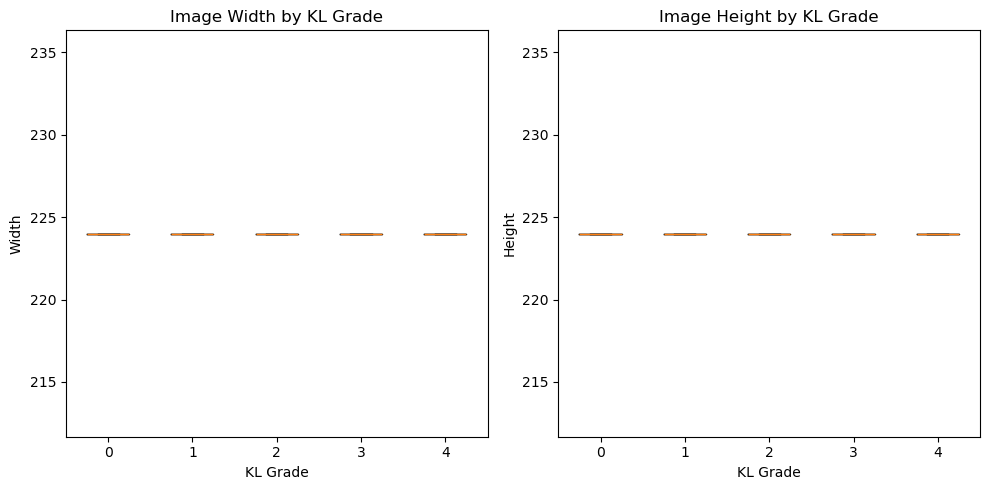

In [16]:
def plot_image_dimensions_vs_kl_grade(df):
    dimensions = []  # Initialize a list to store width, height, and label
    
    # Iterate over each image path and corresponding label
    for img_path, label in zip(df['image_path'], df['label']):
        with Image.open(img_path) as img:  # Open the image file
            dimensions.append((img.size[0], img.size[1], label))  # Append (width, height, label) to the list
    
    # Create a DataFrame from the dimensions list
    dim_df = pd.DataFrame(dimensions, columns=['width', 'height', 'label'])
    
    plt.figure(figsize=(10, 5))  # Set figure size for the plots
    
    # Plot width vs KL grade
    plt.subplot(1, 2, 1)  # Create the first subplot for width distribution
    plt.boxplot([dim_df[dim_df['label'] == kl]['width'] for kl in sorted(dim_df['label'].unique())], 
                labels=sorted(dim_df['label'].unique()))
    plt.title('Image Width by KL Grade')  # Set title for width plot
    plt.xlabel('KL Grade')  # Label x-axis
    plt.ylabel('Width')  # Label y-axis
    
    # Plot height vs KL grade
    plt.subplot(1, 2, 2)  # Create the second subplot for height distribution
    plt.boxplot([dim_df[dim_df['label'] == kl]['height'] for kl in sorted(dim_df['label'].unique())], 
                labels=sorted(dim_df['label'].unique()))
    plt.title('Image Height by KL Grade')  # Set title for height plot
    plt.xlabel('KL Grade')  # Label x-axis
    plt.ylabel('Height')  # Label y-axis
    
    plt.tight_layout()  # Adjust layout to prevent overlap between subplots
    plt.show()  # Display the plots

# Plot image dimensions vs KL grade for the training set
plot_image_dimensions_vs_kl_grade(train_df)  # Call the function for the training dataset

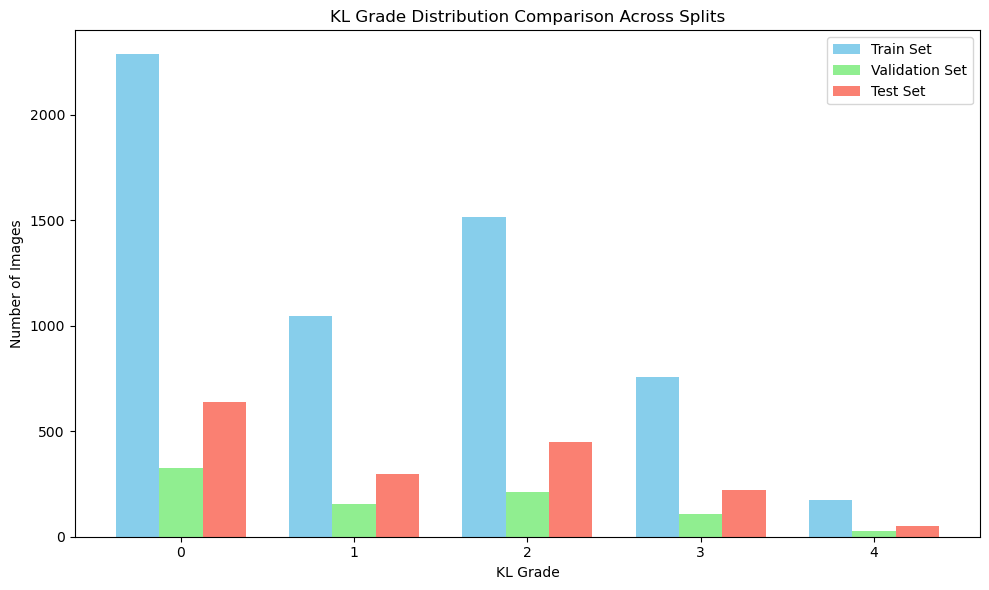

In [17]:
def plot_kl_distribution_comparison(train_df, val_df, test_df):
    # Count occurrences of each KL grade in the training, validation, and test DataFrames
    train_counts = train_df['label'].value_counts().sort_index()
    val_counts = val_df['label'].value_counts().sort_index()
    test_counts = test_df['label'].value_counts().sort_index()
    
    # Get the unique KL grades sorted for labeling the x-axis
    labels = sorted(train_df['label'].unique())
    
    plt.figure(figsize=(10, 6))  # Set figure size for the plot
    bar_width = 0.25  # Define the width of the bars
    index = np.arange(len(labels))  # Create an index for the x-axis positions
    
    # Plot bars for each dataset
    plt.bar(index, train_counts, bar_width, label='Train Set', color='skyblue')  # Training set bars
    plt.bar(index + bar_width, val_counts, bar_width, label='Validation Set', color='lightgreen')  # Validation set bars
    plt.bar(index + 2 * bar_width, test_counts, bar_width, label='Test Set', color='salmon')  # Test set bars
    
    plt.xlabel('KL Grade')  # Label for the x-axis
    plt.ylabel('Number of Images')  # Label for the y-axis
    plt.title('KL Grade Distribution Comparison Across Splits')  # Title of the plot
    plt.xticks(index + bar_width, labels)  # Set x-tick labels to match the KL grades
    plt.legend()  # Display legend for the datasets
    
    plt.tight_layout()  # Adjust layout to prevent overlap of elements
    plt.show()  # Display the plot

# Compare KL grade distributions across splits
plot_kl_distribution_comparison(train_df, val_df, test_df)  # Call the function to plot the comparison

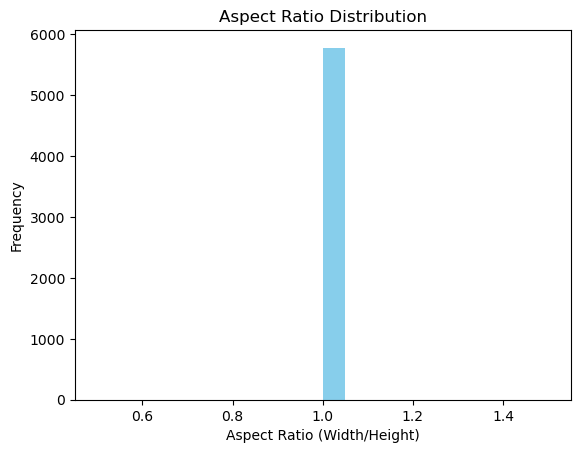

In [18]:
def check_aspect_ratios(df):
    aspect_ratios = []  # Initialize a list to store aspect ratios of images
    
    # Iterate over each image path in the DataFrame
    for img_path in df['image_path']:
        with Image.open(img_path) as img:  # Open the image file
            width, height = img.size  # Get the dimensions of the image
            aspect_ratios.append(width / height)  # Calculate and append aspect ratio (width/height)
    
    # Create a histogram to visualize the distribution of aspect ratios
    plt.hist(aspect_ratios, bins=20, color='skyblue')  # Plot the histogram with 20 bins
    plt.title('Aspect Ratio Distribution')  # Set the title for the histogram
    plt.xlabel('Aspect Ratio (Width/Height)')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.show()  # Display the histogram

# Check aspect ratio consistency in the training set
check_aspect_ratios(train_df)  # Call the function for the training dataset

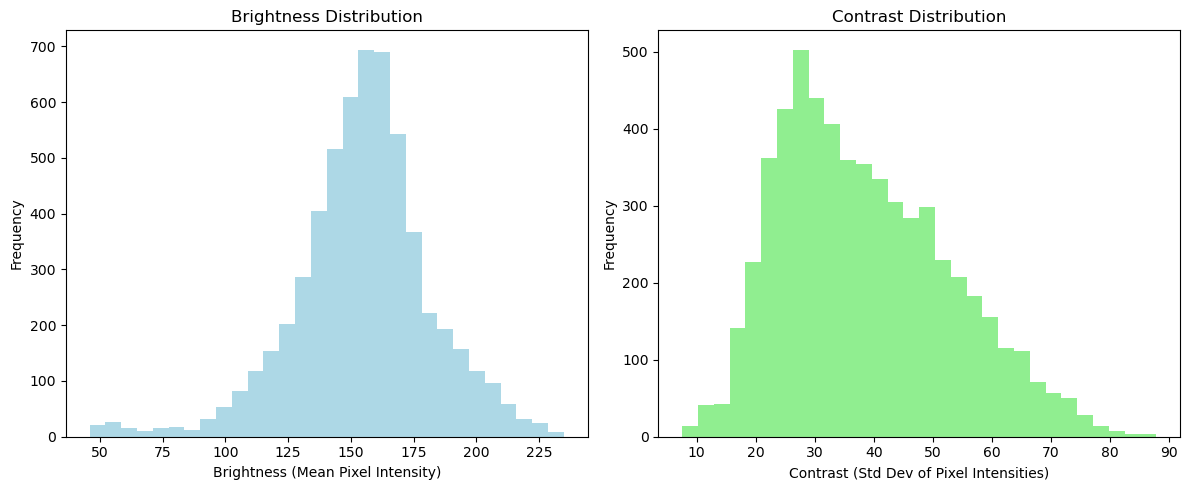

In [19]:
def check_brightness_contrast(df):
    brightness = []  # Initialize a list to store brightness values
    contrast = []  # Initialize a list to store contrast values
    
    # Iterate over each image path in the DataFrame
    for img_path in df['image_path']:
        with Image.open(img_path).convert('L') as img:  # Open the image and convert it to grayscale
            stat = ImageStat.Stat(img)  # Calculate statistics of the image
            brightness.append(stat.mean[0])  # Append average pixel intensity for brightness
            contrast.append(stat.stddev[0])  # Append standard deviation of pixel intensities for contrast
    
    plt.figure(figsize=(12, 5))  # Set figure size for the plots
    
    # Brightness histogram
    plt.subplot(1, 2, 1)  # Create the first subplot for brightness distribution
    plt.hist(brightness, bins=30, color='lightblue')  # Plot the histogram for brightness
    plt.title('Brightness Distribution')  # Set title for brightness histogram
    plt.xlabel('Brightness (Mean Pixel Intensity)')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis

    # Contrast histogram
    plt.subplot(1, 2, 2)  # Create the second subplot for contrast distribution
    plt.hist(contrast, bins=30, color='lightgreen')  # Plot the histogram for contrast
    plt.title('Contrast Distribution')  # Set title for contrast histogram
    plt.xlabel('Contrast (Std Dev of Pixel Intensities)')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis

    plt.tight_layout()  # Adjust layout to prevent overlap of elements
    plt.show()  # Display the histograms

# Check brightness and contrast in the training set
check_brightness_contrast(train_df)  # Call the function for the training dataset

Found 5778 images belonging to 5 classes.


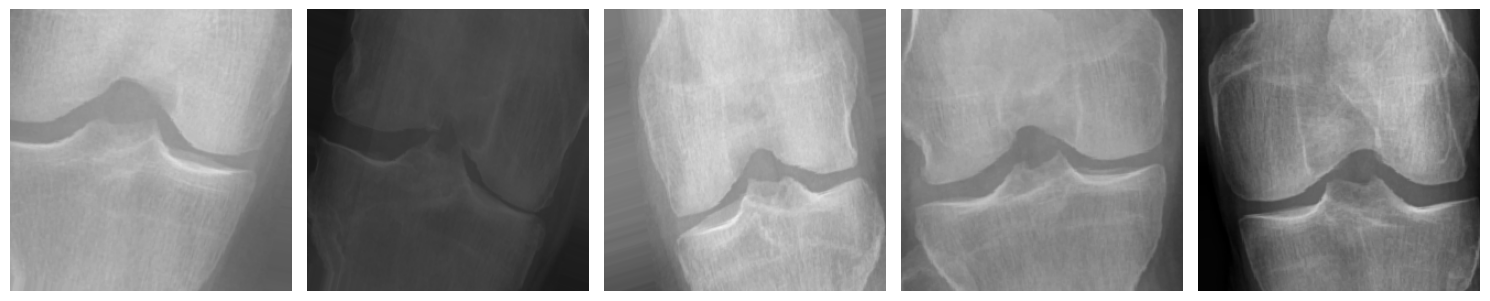

In [20]:
# Define ImageDataGenerator with augmentations
train_datagen = ImageDataGenerator(
    rotation_range=20,         # Randomly rotate images by 20 degrees
    width_shift_range=0.1,     # Randomly shift images horizontally by 10%
    height_shift_range=0.1,    # Randomly shift images vertically by 10%
    shear_range=0.2,           # Shear images by 20%
    zoom_range=0.2,            # Random zoom by 20%
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill missing pixels after transformations
)

# Augment training images
train_generator = train_datagen.flow_from_directory(
    train_dir,                 # Directory for training images
    target_size=(256, 256),    # Resize images to a fixed size
    batch_size=32,             # Batch size for training
    class_mode='categorical'   # Multi-class classification
)

# Example: visualize a few augmented images
def show_augmented_images(generator, num_images=5):
    plt.figure(figsize=(15, 5))
    batch = next(generator)  # Get a batch of augmented images
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(batch[0][i].astype('uint8'))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display a sample of augmented images
show_augmented_images(train_generator)
